In this blog, we discuss how to draw publication quality blogs in `Julia`. We will use the package `PGFPlotsX`. 

**Jupyter notebook for this blog.** The jupyter notebook for this blog can be downloaded from [this link](https://raw.githubusercontent.com/Shuvomoy/blog/gh-pages/codes/publication_quality_plots_in_Julia.ipynb).

First, we install the package, of course.

In [1]:
# using Pkg
# Pkg.add("PGFPlotsX")
using PGFPlotsX

### First Example
We start with a very easy example. We plot $x^2$ vs $x$. To insert Latex compatible code we use the package `using LaTeXStrings`.

In [2]:
using LaTeXStrings

In [3]:
x = range(0.1,stop=5, length = 50);
y = x.^2;

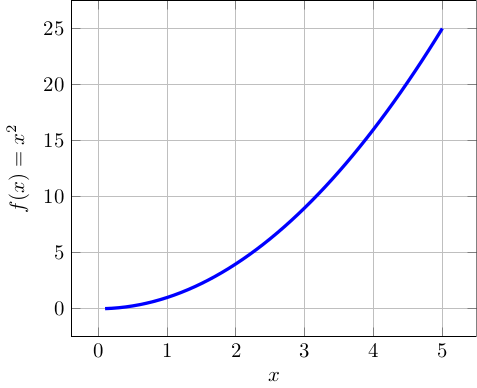

In [4]:
plot1 = @pgf Axis(
    {
        xmajorgrids, # show grids along x axis
        ymajorgrids, # show grids along y axis
        xlabel = L"x",  # L"()" shows $()$ in latex math
        ylabel = L"f(x)=x^2" 
    },
    Plot(
        {
            "no marks",
            style = "{ultra thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "blue" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(x, y)
    )
)

### Saving a plot
We can save the plot above by running the following command.

In [5]:
pgfsave("first_plot.tex", plot1) # will save a tex file
pgfsave("firt_plot.pdf", plot1) # will save a pdf file
pgfsave("first_plot.svg", plot1) # will save a svg file

### Drawing multiple functions on the same plot

As our second example, let us plot both $x^2$ and $\log(x)$ over $\mathbf{R}_{++}$ on the same plot.  

In [6]:
x = range(.1,stop=10, length = 100);
y = x.^2;
z = log.(x);

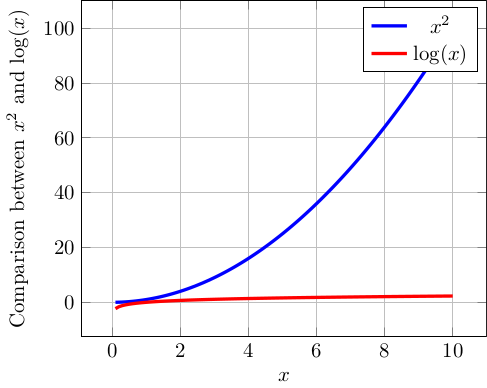

In [7]:
@pgf Axis(
    {
        xmajorgrids, # show grids along x axis
        ymajorgrids, # show grids along y axis
        xlabel = L"x",  # L"()" shows $()$ in latex math
        ylabel = L"Comparison between $x^2$ and $\log(x)$"
    },
    PlotInc(
        {
            "no marks",
            style = "{ultra thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "blue" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(x, y)
    ), 
   LegendEntry(L"x^2"),
    PlotInc(
        {
            "no marks",
            style = "{ultra thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "red" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(x, z)
    ),
  LegendEntry(L"\log(x)")
)

### Plotting error bars

An error bar shows the reliability of a data point. 

Consider the hypothetical scenario. Suppose, there are $m$ different scenarios for a potential experiment, and for each value of $m$ we want to measure some entity $x^{\rm{true}}_{m}$. Unfortunately, our measuring instrument has some error, so we need to take multiple measurements for each $m$. For each value of $m$, we can have $n$ different measurements of $x^{\rm{true}}_{m}$. Suppose, for each value of $m$, we have the measured data points ${x^{(1)}_m, x^{(2)}_m, \ldots, x^{(n)}_m}$. We can compute the mean for each value of $m$, which we denote by $\bar{x}_m$, however it is likely to have some error from the real $x^{\rm{true}}_{m}$, which we can quantify via computing the reliability. For each value of $m$, compute the standard deviation $\sigma_m$ of the observed data points, and then create the confidence interval:
$$
 [\bar{x}_m - \frac{\sigma_m}{\sqrt{n}}, \bar{x}_m + \frac{\sigma_m}{\sqrt{n}}],
$$

which is also called one standard error band around the mean. To change the width of this confidence interval, we can also use some mulitple of the estimate of the standard deviation of the mean.


In [8]:
m_array = 1:10
measurements = 1:50
x_matrix_true = 0.5*m_array
x_matrix_noise = randn(length(m_array),length(measurements)) # made up data for this plot
x_matrix = x_matrix_true .+ x_matrix_noise
# so x_array[m, :] will give us the array of all measurements for scenario m; we are interested in computing the following arrays
using Statistics
x_mean = vec(mean(x_matrix, dims = 2)) # mean(matrix, dims = 2)computes the row-wise mean of a matrix
x_std = vec(std(x_matrix, dims = 2))  
x_sem = vec(x_std./sqrt(length(measurements))) # sem = standard error of the mean


10-element Array{Float64,1}:
 0.1604034132861103 
 0.1460304429550008 
 0.1365847039486609 
 0.13948683707167778
 0.1319594461585211 
 0.14365778090865236
 0.1406170456066185 
 0.1418559017096794 
 0.15048702832975708
 0.13851376073434124

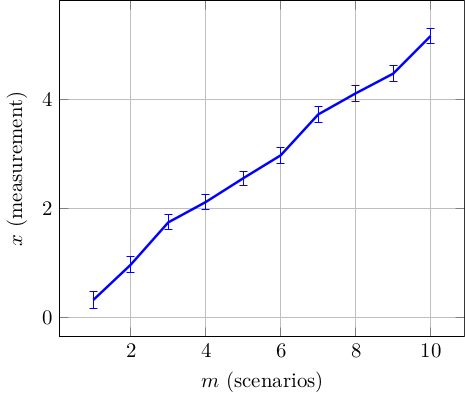

In [9]:

@pgf Axis(
    {
        xmajorgrids, # show grids along x axis
        ymajorgrids, # show grids along y axis
        "error bars/y dir=both",
        "error bars/y explicit",
        xlabel = L"$m$ (scenarios)",  # L"()" shows $()$ in latex math
        ylabel = L"$x$ (measurement)" 
    },
    Plot(
        {
            "no marks",
            style = "{very thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "blue" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(m_array, x_mean; yerror = x_sem)
    )
)

### The same error bar, but fancier
The same plot, but with fancier options is below.

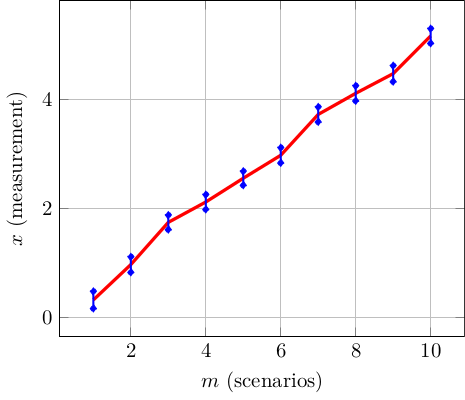

In [10]:

@pgf Axis(
    {
        xmajorgrids, # show grids along x axis
        ymajorgrids, # show grids along y axis
        "error bars/y dir=both",
        "error bars/error mark=diamond*",
        "error bars/y explicit",
        "error bars/error bar style={line width=1pt, dashed}",
        "error bars/error bar style={blue}",
        xlabel = L"$m$ (scenarios)",  # L"()" shows $()$ in latex math
        ylabel = L"$x$ (measurement)" 
    },
    Plot(
        {
            "no marks",
            style = "{ultra thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "red" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(m_array, x_mean; yerror = x_sem)
    )
)

### Multiple plots with error bars 
In a similar manner, we can plot multiple plots with error bars as follows.

In [11]:
m_array = 1:10
measurements = 1:50

x_matrix_true = 0.5*m_array
x_matrix_noise = randn(length(m_array),length(measurements)) 
x_matrix = x_matrix_true .+ x_matrix_noise

y_matrix_true = 0.5*sqrt.(m_array)
y_matrix_noise = randn(length(m_array),length(measurements)) 
y_matrix = y_matrix_true .+ y_matrix_noise

x_mean = vec(mean(x_matrix, dims = 2)) # mean(matrix, dims = 2)computes the row-wise mean of a matrix
x_std = vec(std(x_matrix, dims = 2))  
x_sem = vec(x_std./sqrt(length(measurements))) # sem = standard error of the mean

y_mean = vec(mean(y_matrix, dims = 2)) # mean(matrix, dims = 2)computes the row-wise mean of a matrix
y_std = vec(std(y_matrix, dims = 2))  
y_sem = vec(y_std./sqrt(length(measurements))) # sem = standard error of the mean

10-element Array{Float64,1}:
 0.13382424056139092
 0.15169294891036073
 0.12455783827400334
 0.14694898448593774
 0.15490045368362218
 0.14199887043991172
 0.13742334894544558
 0.12821628839800778
 0.13339558092910958
 0.13009038005264217

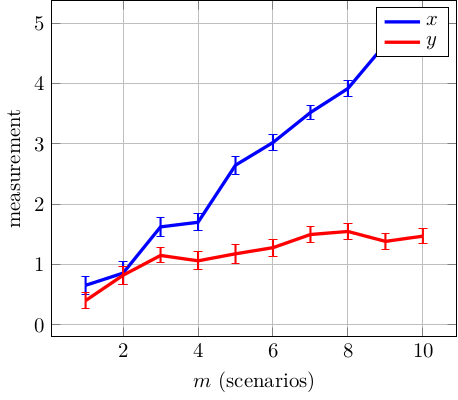

In [12]:
@pgf Axis(
    {
        xmajorgrids, # show grids along x axis
        ymajorgrids, # show grids along y axis
        "error bars/y dir=both",
        "error bars/y explicit",
        "error bars/error bar style={line width=1pt}",
        xlabel = L"$m$ (scenarios)",  # L"()" shows $()$ in latex math
        ylabel = "measurement" 
    },
    PlotInc(
        {
            "no marks",
            style = "{ultra thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "blue" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(m_array, x_mean; yerror = x_sem)
    ), 
   LegendEntry(L"x"),
    PlotInc(
        {
            "no marks",
            style = "{ultra thick}",
            # style determines the linewidth: ultra thin, very thin, semithick, thick, very thick, ultra thick 
            color = "red" 
            # other possible colors are red, green, blue, cyan, magenta, yellow, black, gray, darkgray, lightgray, brown, lime, olive, orange, pink, purple, teal, violet and white
        },
        Coordinates(m_array, y_mean; yerror = y_sem)
    ),
  LegendEntry(L"y")
)